# Investigate TMDb - Movies Dataset

## Table of contents
    1) Introduction
    2) Data Wrangling
    3) Exploratory Data Analysis
    4) Conclusion
    
## Introduction
        - The selected Dataset is the TMDb Movies Dataset
        - This data collection comprises information from The Movie Database (TMDb) about 10,000 movies, including user 
          ratings and revenue. It has 21 columns, including imdb id, revenue, budget, vote count, and so on.

In [1]:
''' This cell is used to set up import statements for all of the packages I intend to utilise'''
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
''' Reading the dataset.csv file ana analysis what questions can we ask about this dataset. '''
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

## Questions to analyse from this dataset:
        - The average length of all the films.
        - Is the film industry making profit over years?
        - Which year had the most number of lucrative films?
        - Movies with the highest and lowest budgets.
        - Movies with the highest and lowest revenue.
### What makes a successful profitable:
        - average budget.
        - average revenue.
        - average duration.

In [3]:
''' Printing a concise summary of the dataset'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Important observations:
    - There is 21 columns and 10856 entries for each column. Some columns have missing entries
    - Remove unused columns ( ID, IMDB, etc...)
    - Remove duplicates
    - Changing format of some columns like ( date, budget)
    - There is no unit of currency mentioned. Dollars will be used.
    - Columns that must be deleted are as follows: id, imdb_id, popularity, budget_adj, revenue_adj, homepage,
    keywords, overview, production_companies, vote_count and vote_average.

## Data wrangling

In [4]:
''' Removing specified columns and prevewing the new dataset'''
df = df.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj',
         'homepage', 'keywords', 'overview', 'production_companies',
         'vote_count', 'vote_average'],1)
df.head(4)

C:\Users\Dell\AppData\Local\Temp/ipykernel_2044/2717179579.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj',


budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
1  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
2         Adventure|Science Fiction|Thriller      3/18/15          2015  
3   Action|Adventure|Science Fiction|Fantasy     12/15/15          2015

In [5]:
'''Returning sum for NULL values in dataset, otherwise 0.'''
''' Showing which columns has missing values '''
df.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [6]:
''' remove the 0 in the budget, revenue and runtime columns '''
zeros_to_nan = ['budget', 'revenue', 'runtime']
df[zeros_to_nan] = df[zeros_to_nan].replace(0, np.NAN)

In [7]:
'''Remove rows and columns with Null/NaN values.'''
df.dropna(inplace = True)

In [8]:
'''Returning sum for duplicated values in dataset, otherwise 0.'''
df.duplicated().sum()

1

### There is one duplicatae only in the dataset

In [9]:
'''Remove rows and columns with duplicated values values.'''
df.drop_duplicates(keep = 'first', inplace = True)

In [10]:
'''The number of rows and columns as a tuple (number of rows, number of columns).'''
df.shape

(3572, 10)

### There is 3572 rows and 10 columns in the dataset.

### Changing the format of budget, revenue and release date.

In [11]:
''' checking the data format of each column. '''
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime           float64
genres             object
release_date       object
release_year        int64
dtype: object

In [12]:
df.release_date = pd.to_datetime(df['release_date'])

In [13]:
'''changing data type'''
df['revenue'] = (df['revenue']).astype('int64')
df['budget'] = (df['budget']).astype('int64')
df['runtime'] = (df['runtime']).astype('int64')
'''checking for changed data types'''
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

# Exploratory Data Analysis
### Exploring our dataset by answering the questions mentioned above.

First exploring our dataframe in by 1 dimensional graphs

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

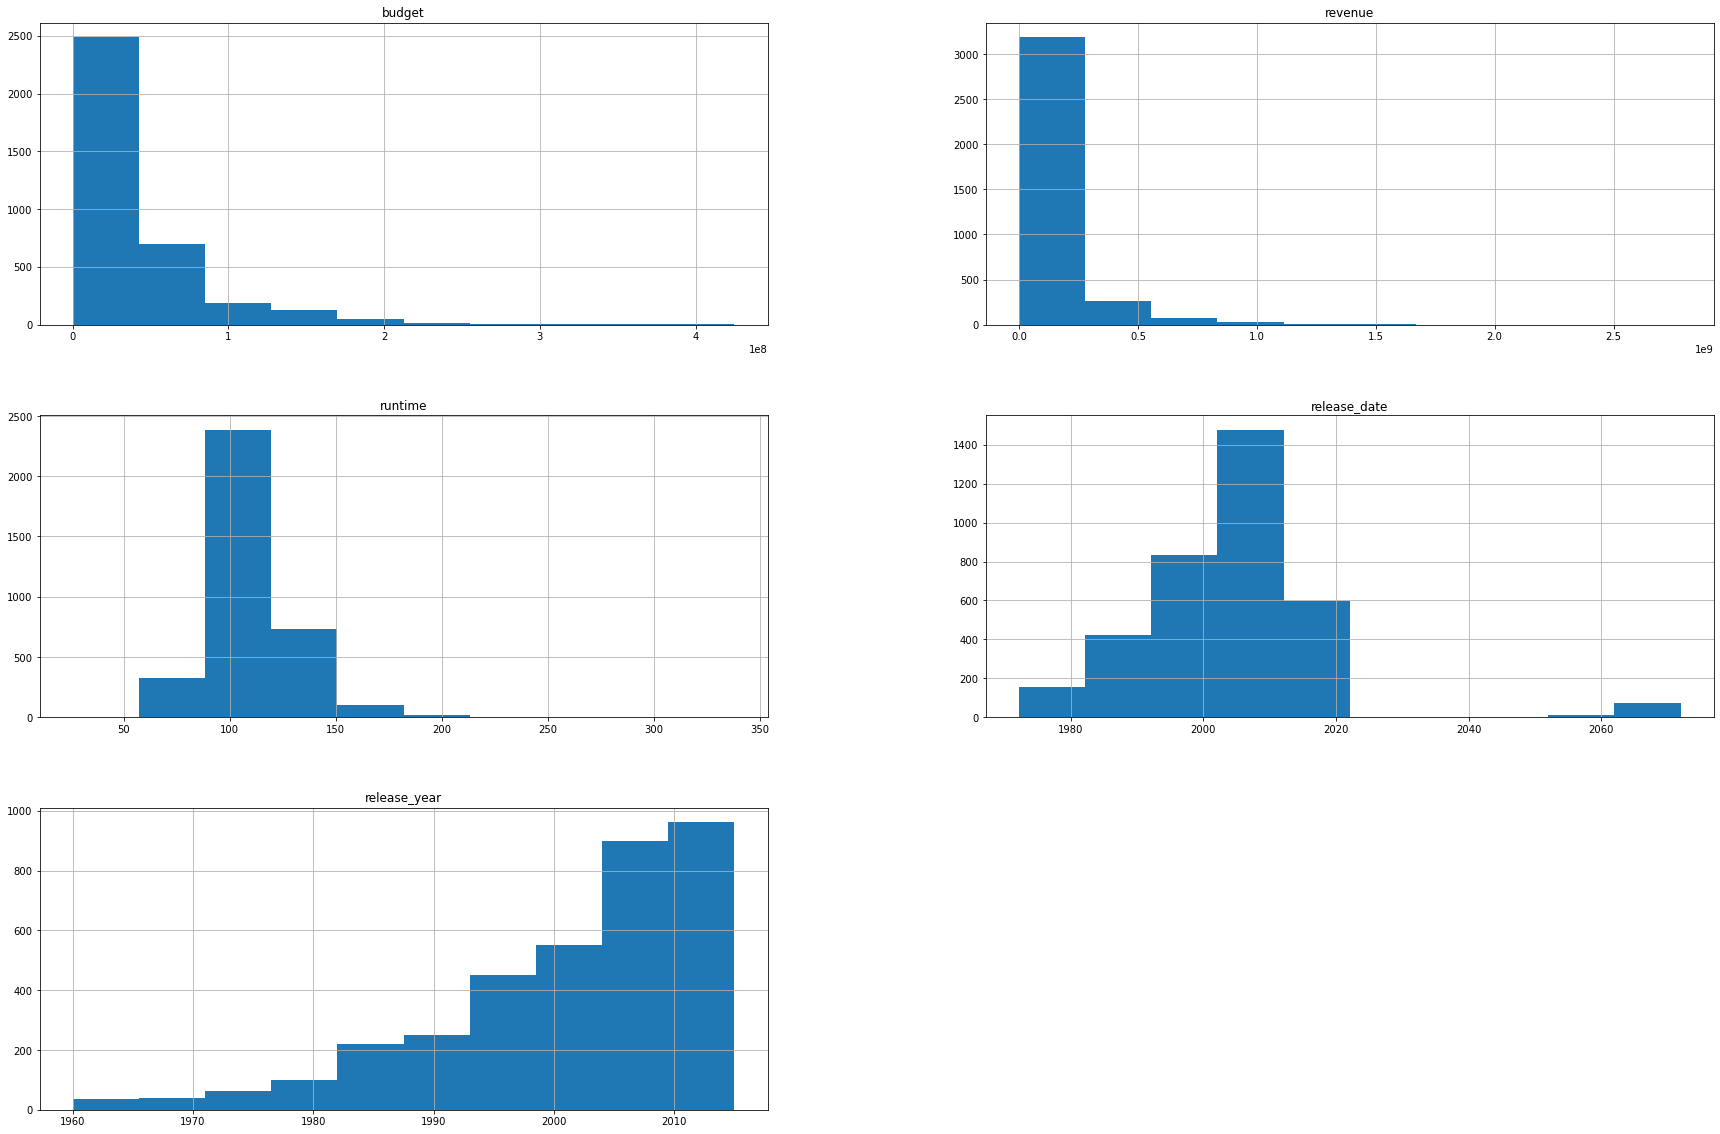

In [14]:
'plotting histograms for every column in the dataframe'
df.hist(figsize=(30,20))

## From the graphs above that describe our data we can conclude that:
    1- From the release_year histogram : each year more movies are released. (left skewed)
    2- From the release_date histogram : after 2010 movies release dates has peaked.
    3- From the runtime histogram : most movies are around 100 minutes.
    4- Budget, revenue and profit histograms are right skewed.

## Q1) The average length of all the films.

In [15]:
df['runtime'].describe()

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [16]:
'''Defining a function that can be called later on in other questions that helps with calculating highest and lowest values'''
def calculate(column):
    maximum = df[column].idxmax()
    maximum_details=pd.DataFrame(df.loc[maximum])
    minimum= df[column].idxmin()
    minimum_details=pd.DataFrame(df.loc[minimum])
    info=pd.concat([maximum_details, minimum_details], axis=1)
    return info

calculate('runtime')

2107  \
budget                                                   18000000   
revenue                                                    871279   
original_title                                             Carlos   
cast            Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...   
director                                          Olivier Assayas   
tagline                            The man who hijacked the world   
runtime                                                       338   
genres                               Crime|Drama|Thriller|History   
release_date                                  2010-05-19 00:00:00   
release_year                                                 2010   

                                                             8005  
budget                                                    3000000  
revenue                                                  21000000  
original_title                           Mickey's Christmas Carol  
cast            Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...  
director                                          Burny Mattinson  
tagline         He's back! Mickey Mouse - in his first new mot...  
runtime                                                        26  
genres                                           Family|Animation  
release_date                                  1983-10-19 00:00:00  
release_year                                                 1983

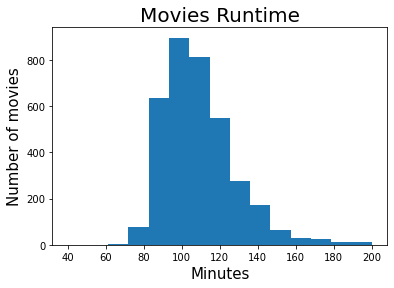

In [17]:
'''plotting a histogram of runtime of movies'''
plt.hist(df['runtime'], range = (40,200),bins = 15)
plt.title('Movies Runtime', fontsize = 20)
plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.show()

### We can see from the histogram that the majority of the movies have an average runtime between 90 and 110 minutes.

In [18]:
''' Defining some variables to help us in plotting a figure for the average runtime over the years'''
grouped_movies = df['runtime'].groupby(df['release_year']).describe()

In [19]:
''' defining the average runtime by year, max and min'''
avg_runtime_by_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] + grouped_movies['std']

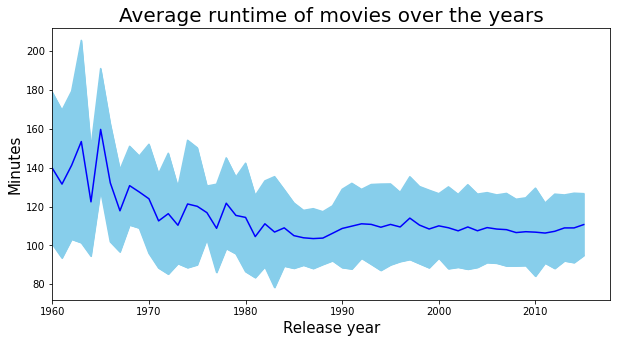

In [20]:
''' plotting a figure that helps us use runtime changes along the years'''
fig, x = plt.subplots(figsize = (10,5))
x.plot(avg_runtime_by_year, color = 'blue')
x.plot(avg_runtime_min, color = 'skyblue')
x.plot(avg_runtime_max, color = 'skyblue')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average runtime of movies over the years', fontsize = 20)
x.set_xlabel('Release year', fontsize = 15)
x.set_ylabel('Minutes', fontsize = 15)
x.set_xlim(1960)
plt.show()

### We can see from the above graph that the runtime of movies in the 60's was a lot higher than the rest of the years. Otherwise runtime didn't change much long the years.

## Q2) Is the film industry making profit over years?

In [21]:
''' Inserting a new column in our dataset and calling it profit, calculating it by revenue - budget'''
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

budget      profit     revenue                original_title  \
0  150000000  1363528810  1513528810                Jurassic World   
1  150000000   228436354   378436354            Mad Max: Fury Road   
2  110000000   185238201   295238201                     Insurgent   
3  200000000  1868178225  2068178225  Star Wars: The Force Awakens   
4  190000000  1316249360  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
1  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
2         Adventure|Science Fiction|Thriller   2015-03-18          2015  
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15          2015  
4                      Action|Crime|Thriller   2015-04-01          2015

In [22]:
grouped_movies_2 = df['profit'].groupby(df['release_year']).describe()

In [23]:
avg_profit_by_year = grouped_movies_2['mean']
avg_profit_min = grouped_movies_2['mean'] - grouped_movies_2['std']
avg_profit_max = grouped_movies_2['mean'] + grouped_movies_2['std']

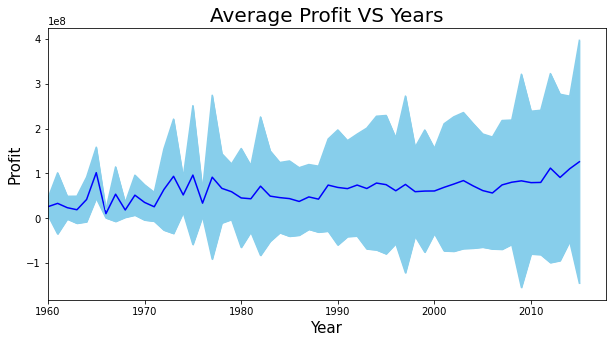

In [24]:
''' plotting a figure that helps us see profit changes along the years'''
fig, y = plt.subplots(figsize = (10,5))
y.plot(avg_profit_by_year, color = 'blue')
y.plot(avg_profit_min, color = 'skyblue')
y.plot(avg_profit_max, color = 'skyblue')
y.fill_between(grouped_movies_2.index, avg_profit_min, avg_profit_max, color = 'skyblue')
y.set_title('Average Profit VS Years', fontsize = 20)
y.set_xlabel('Year', fontsize = 15)
y.set_ylabel('Profit', fontsize = 15)
y.set_xlim(1960)
plt.show()

### We can see from the above graph that profit increased along the years. The industry is growing.

## Q3) Which year has the most number of movie releases?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


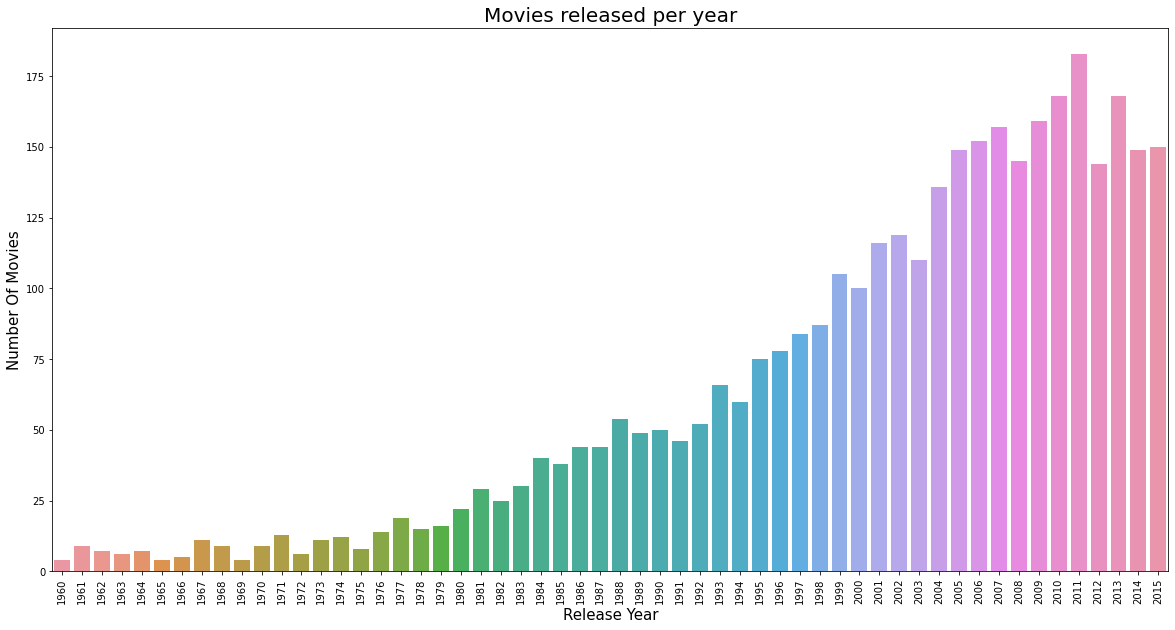

In [25]:
''' plotting a figure that helps see which year had the highest movies quantity'''
plt.figure(figsize = (20,10))
sns.countplot(df['release_year'])
plt.title('Movies released per year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number Of Movies', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### We can see from the above figure that 2011 had the most highest number of movies. This shows that movies demand and supply is growing.

## Q4) Movies with the highest and lowest budgets.

In [26]:
''' calling the function we coded earlier '''
calculate('budget')

2244  \
budget                                                  425000000   
profit                                                 -413912431   
revenue                                                  11087569   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
tagline                                   Assassin. Hero. Legend.   
runtime                                                       100   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                  2010-12-02 00:00:00   
release_year                                                 2010   

                                                             2618  
budget                                                          1  
profit                                                         99  
revenue                                                       100  
original_title                                       Lost & Found  
cast            David Spade|Sophie Marceau|Ever Carradine|Step...  
director                                             Jeff Pollack  
tagline         A comedy about a guy who would do anything to ...  
runtime                                                        95  
genres                                             Comedy|Romance  
release_date                                  1999-04-23 00:00:00  
release_year                                                 1999

### The highest budget movie is "The Warrior's Way" and the lowest budget movie is "100".

## Q5) Movies with the highest and lowest revenues.

In [27]:
calculate('revenue')

1386  \
budget                                                  237000000   
profit                                                 2544505847   
revenue                                                2781505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                  2009-12-10 00:00:00   
release_year                                                 2009   

                                                             8142  
budget                                                    6000000  
profit                                                   -5999998  
revenue                                                         2  
original_title                                           Mallrats  
cast            Jason Lee|Jeremy London|Shannen Doherty|Claire...  
director                                              Kevin Smith  
tagline         They're not there to shop. They're not there t...  
runtime                                                        94  
genres                                             Romance|Comedy  
release_date                                  1995-10-20 00:00:00  
release_year                                                 1995

### The highest revenue movie is "Avatar" and the lowest revenue movie is "Mallrats".

## What makes a succesful profitable
### We will be considering movies that made considerable amount of profit ( 50M dollars or more ).

In [28]:
profit_data = df[df['profit'] >= 50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
profit_data.head(4)

budget      profit     revenue                original_title  \
1  150000000  1363528810  1513528810                Jurassic World   
2  150000000   228436354   378436354            Mad Max: Fury Road   
3  110000000   185238201   295238201                     Insurgent   
4  200000000  1868178225  2068178225  Star Wars: The Force Awakens   

                                                cast          director  \
1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
2  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
3  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
4  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   

                         tagline  runtime  \
1              The park is open.      124   
2             What a Lovely Day.      120   
3     One Choice Can Destroy You      119   
4  Every generation has a story.      136   

                                      genres release_date  release_year  
1  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
2  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
3         Adventure|Science Fiction|Thriller   2015-03-18          2015  
4   Action|Adventure|Science Fiction|Fantasy   2015-12-15          2015

## Average budget.

In [29]:
profit_data['budget'].mean()

60827647.54760092

## Average Revenue.

In [30]:
profit_data['revenue'].mean()

256486189.0571211

## Average Runtime.

In [31]:
profit_data['runtime'].mean()

113.57578065498858

# Conclusions
### The film industry profit increases overtime, the number of movies are increasing over years, The average runtime is 100 min.

### To make a successful movie you need an average budget of 61M dollars and have an average duration of 113 minutes in order to obtain an average revenue of 260M dollars.

# Limitations
### The analysis is not full proof and a lot of data was lost in the cleaning of data process but it can make the movie successful .

# Reference:
### https://github.com/beingjainparas/Udacity-Investigate_a_dataset/blob/master/Investigate_a_dataset-TMDb_movie_database.ipynb